In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.stats import norm, linregress

In [2]:
csv_path_1 = "Resources/tmdb_5000_movies.csv"
csv_path_2 = "Resources/tmdb_5000_credits.csv"
df_movies = pd.read_csv(csv_path_1)
df_credits = pd.read_csv(csv_path_2)
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
# time series analysis
# dictionary key is a string of year and content is a list with num, revenue, rating, voting total
year_total = {}
period_total = {}
for i in df_movies.index:
    date = df_movies['release_date'][i]
    try:
        date_list = date.split('-')
    except:
        continue
    for j in range(3):
        date_list[j] = int(date_list[j])
    date_period = date_list[1]
    year = date_list[0] // 10
    if year in year_total.keys():
        year_total[year][0] += 1
        year_total[year][1] += df_movies['revenue'][i]
        year_total[year][2] += df_movies['vote_average'][i] * df_movies['vote_count'][i]
        year_total[year][3] += df_movies['vote_count'][i]
    else:
        year_total[year] = [1, df_movies['revenue'][i], 
                                    df_movies['vote_average'][i] * df_movies['vote_count'][i], 
                                    df_movies['vote_count'][i]]
    if date_period in period_total.keys():
        period_total[date_period][0] += 1
        period_total[date_period][1] += df_movies['revenue'][i]
        period_total[date_period][2] += df_movies['vote_average'][i] * df_movies['vote_count'][i]
        period_total[date_period][3] += df_movies['vote_count'][i]
    else:
        period_total[date_period] = [1, df_movies['revenue'][i], 
                                    df_movies['vote_average'][i] * df_movies['vote_count'][i], 
                                    df_movies['vote_count'][i]] 
columns = {'index': 'years', 0: 'total_num', 1: 'average_revenue', 2: 'rating', 
           3: 'voting_total'}
inflate = [25.4, 14.6, 18.7, 14.25, 9.57, 8.15, 4.77, 2.38, 1.68, 1.31, 1.08]
for i in year_total.keys():
    year_total[i][1] = year_total[i][1] / year_total[i][0]
    year_total[i][2] = year_total[i][2] / year_total[i][3]
for i in period_total.keys():
    period_total[i][1] = period_total[i][1] / period_total[i][0]
    period_total[i][2] = period_total[i][2] / period_total[i][3]
df_year = pd.DataFrame(year_total)
df_year = df_year.transpose()
df_year = df_year.rename(columns = columns)
df_year = df_year.sort_index()
df_year = df_year.reset_index()
df_year['years'] = [1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
for i in range(11):
    df_year['average_revenue'][i] = df_year['average_revenue'][i]  * inflate[i] /1000000
df_period = pd.DataFrame(period_total)
df_period = df_period.transpose()
df_period = df_period.rename(columns = columns)
df_period = df_period.sort_index()
df_period['month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
df_period

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,total_num,average_revenue,rating,voting_total,month
1,382.0,2.863406e+07,6.241965,128480.0,1
2,326.0,5.613842e+07,6.575646,183288.0,2
3,372.0,7.310316e+07,6.611508,251744.0,3
4,350.0,7.392762e+07,6.642147,218069.0,4
5,363.0,1.339301e+08,6.794200,353405.0,5
6,389.0,1.522845e+08,6.664778,396249.0,6
7,363.0,1.115768e+08,6.808616,344812.0,7
8,413.0,5.580475e+07,6.502325,209743.0,8
9,588.0,3.999196e+07,6.880858,287199.0,9
10,474.0,5.289629e+07,6.947307,280776.0,10


In [159]:
df_year

,index,total_num,average_revenue,rating,voting_total,years
0,191,1.0,213.226675,7.400000,60.0,1910
1,192,4.0,98.580740,7.870620,742.0,1920
2,193,15.0,836.898601,7.389728,6182.0,1930
3,194,25.0,337.867941,7.333215,7325.0,1940
4,195,27.0,136.086167,7.838040,7203.0,1950
5,196,71.0,255.821490,7.543267,27730.0,1960
6,197,109.0,286.360086,7.585408,62479.0,1970
7,198,278.0,145.225961,7.185631,146993.0,1980
8,199,778.0,132.372833,7.024867,436488.0,1990
9,200,2048.0,100.170344,6.693273,1195884.0,2000


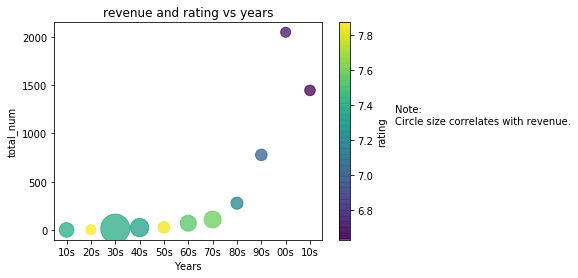

In [177]:
average_revenue = df_year['average_revenue'].tolist()
df_year.plot.scatter(x = 'years', y = 'total_num', s = average_revenue, 
                     c = 'rating', colormap='viridis', sharex=False, alpha = 0.75)
# plt.xlim(1905, 2020)
# plt.ylim(-150, 1600)
plt.title("revenue and rating vs years")
plt.xlabel("Years")
plt.ylabel("total_num")
plt.xticks((1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010), 
           ('10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '00s', '10s'))
plt.text(2045, 1100, 'Note:\nCircle size correlates with revenue.')
plt.show()

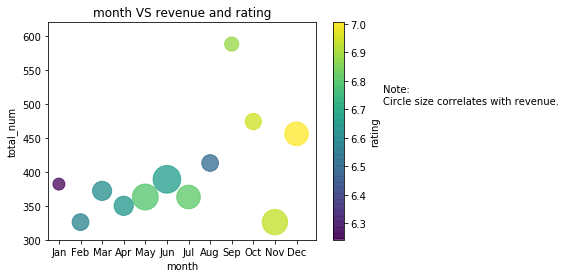

In [198]:
average_revenue_period = df_period['average_revenue'].tolist()
size = 0.000005
for i in range(len(average_revenue_period)):
    average_revenue_period[i] = average_revenue_period[i] * size
df_period.plot.scatter(x = 'month', y = 'total_num', s = average_revenue_period, 
                     c = 'rating', colormap='viridis', sharex=False, alpha = 0.75)
plt.xlim(0.5, 12.9)
plt.ylim(300, 620)
plt.title("month VS revenue and rating")
plt.xlabel("month")
plt.ylabel("total_num")
plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12), 
           ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.text(16, 500, 'Note:\nCircle size correlates with revenue.')
plt.show()

In [197]:
# runtime vs revenue
# means = df_movies['revenue'].mean()
# df_good_movies = df_movies.loc[(df_movies['revenue'] > means * 10), :]
# df_good_movies.plot.scatter(x = 'runtime', y = 'revenue')
# plt.show()

In [195]:
df_total = pd.merge(df_credits, df_movies, on = 'title')

In [196]:
# actor
# actor dictionary key is a string of actor and content is a list with num, revenue, rating, voting total
actor_dict = {} 
for i in df_credits.index:
    actor = json.loads(df_total['cast'][i])
    for j in actor:
        name = j['name']
        if name in actor_dict.keys():
            actor_dict[name][0] += 1
            actor_dict[name][1] += df_total['revenue'][i]
            actor_dict[name][2] += df_total['vote_average'][i] * df_total['vote_count'][i]
            actor_dict[name][3] += df_total['vote_count'][i]
        else:
            actor_dict[name] = [1, df_total['revenue'][i], 
                                        df_total['vote_average'][i] * df_total['vote_count'][i], 
                                        df_total['vote_count'][i]]
for i in actor_dict.keys():
    actor_dict[i][1] = actor_dict[i][1] / actor_dict[i][0]
    actor_dict[i][2] = actor_dict[i][2] / actor_dict[i][3]
df_actor = pd.DataFrame(actor_dict)
df_actor = df_actor.transpose()
df_actor = df_actor.rename(columns = columns)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


,total_num,average_revenue,rating,voting_total
Sam Worthington,10.0,4.048278e+08,6.623792,21768.0
Zoe Saldana,20.0,3.135167e+08,7.295686,47079.0
Sigourney Weaver,33.0,1.678168e+08,6.909844,47838.0
Stephen Lang,11.0,2.885272e+08,7.004756,15244.0
Michelle Rodriguez,13.0,4.748496e+08,6.754691,30857.0


In [170]:
df_good_actor = df_actor.sort_values('total_num', ascending = False).head(n = 100)
df_good_actor.head()

,total_num,average_revenue,rating,voting_total
Samuel L. Jackson,66.0,2.243343e+08,7.125006,139823.0
Robert De Niro,57.0,8.566498e+07,6.951648,49928.0
Bruce Willis,51.0,1.440872e+08,6.718977,72017.0
Matt Damon,48.0,1.581930e+08,7.197124,73217.0
Morgan Freeman,46.0,2.016408e+08,7.162936,101824.0


In [75]:
genres_dict = {}
for i in df_credits.index:
    genres = json.loads(df_total['genres'][i])
    actor = json.loads(df_total['cast'][i])
    for j in genres:
        name = j['name']
        if name in genres_dict.keys():
            for k in actor:
                name_actor = k['name']
                if name_actor not in genres_dict[name]:
                    genres_dict[name].append(name_actor)
        else:
            genres_dict[name] = [k['name'] for k in actor]

In [175]:
genres_total = {}
for i in df_total.index:
    genres = json.loads(df_total['genres'][i])
    for j in genres:
        name = j['name']
        if name in genres_total.keys():
            genres_total[name][0] += 1
            genres_total[name][1] += df_total['revenue'][i]
            genres_total[name][2] += df_total['vote_average'][i] * df_total['vote_count'][i]
            genres_total[name][3] += df_total['vote_count'][i]
        else:
            genres_total[name] = [1, df_total['revenue'][i], 
                                    df_total['vote_average'][i] * df_total['vote_count'][i], 
                                    df_total['vote_count'][i]]
for i in genres_total.keys():
    genres_total[i][1] = genres_total[i][1] / genres_total[i][0]
    genres_total[i][2] = genres_total[i][2] / genres_total[i][3]
df_genres = pd.DataFrame(genres_total)
df_genres = df_genres.transpose()
df_genres = df_genres.rename(columns = columns)
df_genres = df_genres.sort_values('total_num', ascending = False)
df_genres['order'] = np.arange(20)
df_genres

,total_num,average_revenue,rating,voting_total,order
Drama,2300.0,5.208673e+07,7.074081,1223221.0,0
Comedy,1723.0,7.124812e+07,6.503291,904565.0,1
Thriller,1275.0,8.103039e+07,6.687812,986422.0,2
Action,1156.0,1.413794e+08,6.643109,1314643.0,3
Romance,895.0,6.000611e+07,6.707125,408144.0,4
Adventure,792.0,2.082132e+08,6.726183,1132249.0,5
Crime,697.0,6.605575e+07,6.909248,524012.0,6
Science Fiction,538.0,1.518886e+08,6.723638,765245.0,7
Horror,520.0,4.363151e+07,6.290677,257552.0,8
Family,514.0,1.620296e+08,6.780205,463078.0,9


In [199]:
df_genres_reset = df_genres.reset_index()
df_genres_reset.head()

,index,total_num,average_revenue,rating,voting_total,order
0,Drama,2300.0,5.208673e+07,7.074081,1223221.0,0
1,Comedy,1723.0,7.124812e+07,6.503291,904565.0,1
2,Thriller,1275.0,8.103039e+07,6.687812,986422.0,2
3,Action,1156.0,1.413794e+08,6.643109,1314643.0,3
4,Romance,895.0,6.000611e+07,6.707125,408144.0,4


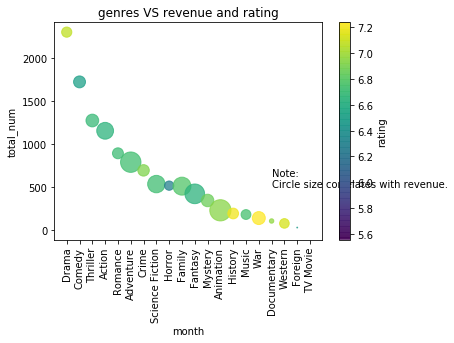

In [215]:
revenue_genres = df_genres['average_revenue'].tolist()
df_genres_reset = df_genres.reset_index()
name_list = df_genres_reset['index'].tolist()
size = 500000
for i in range(len(revenue_genres)):
    revenue_genres[i] = revenue_genres[i] / size
df_genres.plot.scatter(x = 'order', y = 'total_num', s = revenue_genres, 
                     c = 'rating', colormap='viridis', sharex=False, alpha = 0.75, rot = 90)
# plt.xlim(0.5, 12.9)
# plt.ylim(300, 620)
plt.title("genres VS revenue and rating")
plt.xlabel("month")
plt.ylabel("total_num")
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19), 
           tuple(name_list))
plt.text(16, 500, 'Note:\nCircle size correlates with revenue.')
plt.show()

In [222]:
df_movies.head()
df_movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

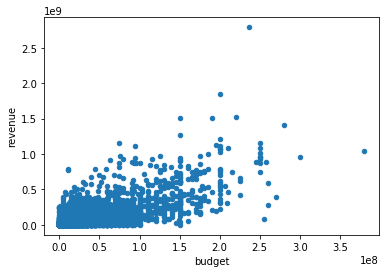

In [232]:
(slope, intercept, _, _, _) = linregress(df_movies['budget'], df_movies['revenue'])
fit = slope * df_movies['budget'] + intercept
df_movies.plot.scatter(x = 'budget', y = 'revenue')
plt.show()

In [ ]:
# budget = {}
# for i in df_movies.index:
    